<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/Final%20python%20notebook%20-%20draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Business understanding and Design Thinking:*

# *Data understanding*

In [27]:
#importing packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 


#loading data
train = pd.read_csv("train updated 04132022.csv")


#set option to display columns and rows of the dataframe fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


*For most fields of the original train dataset, the mean value is higher than the median value due to the outliers (see code below). This can be explained by different types of meters used and/or different operational capacity of a business.*




In [28]:
#creatig a dataframe and displaying basic statistics for all columns
train = pd.DataFrame(train)
train.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,0.232123,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,0.422193,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.890000,4.200000,4.900000,4.200000,4.890000,4.210000,4.900000,4.210000,4.910000,4.210000,4.910000,4.210000,4.910000,4.210000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,0.00000

*Output below shows that the fields that contain missing values contain older data - gathered from 5 up to 14 days prior to April 1st (lag5 - lag14 columns).*

In [29]:
#showing the total number of missing values for every field of the dataframe
train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

*To handle the missing values, we decided to drop the lag5 - lag14 fields that contained older data about the (dis-)charging time and rate. This way we will train our model on the complete number of rows from the original dataset without dropping any records.*

In [30]:
#creating lists of columns we want to drop
cols_avg_time_charging = []
cols_avg_time_discharging = []
for i in range(5,15): 
    col_charging = "avg_time_charging_lag" + str(i)
    cols_avg_time_charging.append(col_charging)
    col_discharging = "avg_time_discharging_lag" + str(i)
    cols_avg_time_discharging.append(col_discharging)

cols_charging_rate = []
for i in range(5,8):
    col_charging_rate = "charging_rate_lag" + str(i)
    cols_charging_rate.append(col_charging_rate)

cols_discharging_rate = []    
for i in range(5,9):
    col_discharging_rate = "discharging_rate_lag" + str(i)
    cols_discharging_rate.append(col_discharging_rate)

#combining them into one list
list_of_field_names_with_nan = []
list_of_field_names_with_nan.extend(cols_discharging_rate)
list_of_field_names_with_nan.extend(cols_charging_rate)
list_of_field_names_with_nan.extend(cols_avg_time_discharging)
list_of_field_names_with_nan.extend(cols_avg_time_charging)


#modifying the dataframe by dropping the said columns
train = train.drop(columns=list_of_field_names_with_nan)

# *Data preparation*

*From here on, we will be modifying the data by organizing the columns, adding new ones, and manipulating the datatype.*

In [31]:
#changing the datetime format in Date Deployed
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y%m%d')


#creating new dataframe with reordered columns for better data understanding
new_df = train.reindex(columns=['deviceid', 'avg_volt_change_charging', 'avg_volt_change_discharging', 'max_voltage_day', 
                                'fail_7', 'charge_cycle_time_below_12', 'Date Deployed', 
                                'avg_time_charging_lag4', 'avg_time_charging_lag3', 'avg_time_charging_lag2', 'avg_time_charging_lag1', 
                                'avg_time_discharging_lag4', 'avg_time_discharging_lag3', 'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 
                                'charging_rate_lag4', 'charging_rate_lag3', 
                                'discharging_rate_lag4', 'discharging_rate_lag3',
                                'avg_time_charging', 'avg_time_discharging', 'cycle_time', 'chargecycles', 'dischargecycles', 'piececount', 'total_off_time', 'number_times_restart'])

In [32]:
#changing datatype of Date Deployed column so it can be considered when building the prediction
new_df['Date Deployed'] = new_df['Date Deployed'].astype(float)


#setting device ID as new dataframe index
new_df.set_index("deviceid", inplace=True)

# *Modelling*

*Using Machine Learning package SKLEARN to split the columns into target variables and features and to divide the dataset into two parts: train and test*.

In [33]:
#split the data into two DataFrames: X (features) and y (target variable)
y = new_df["fail_7"]  # Specify fail_7 as the target variable
X = new_df.drop('fail_7', axis = 1)  # Specify other columns as features


#split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=100)

#show the size of subsets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28350, 25), (12150, 25), (28350,), (12150,))

*For the prediction model, we decided on the decision tree model.*

*Here we used a DataCamp template that lets us evaluate best parameters and best accuracy for the model from a specified range of parameters.*

In [34]:
# Define a parameter grid with distributions of possible parameters to use
random_state_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(4, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
df_model = DecisionTreeClassifier(random_state=100)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
df_model_random_state = RandomizedSearchCV(
    estimator=df_model,
    param_distributions=random_state_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=3,  # The higher this is, the more messages are outputed
    random_state=100,
)

# Train the model on the training set
df_model_random_state.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", df_model_random_state.best_params_)
print("Best accuracy found: ", df_model_random_state.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ccp_alpha=0, criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4;, score=0.790 total time=   1.6s
[CV 2/3] END ccp_alpha=0, criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4;, score=0.801 total time=   1.7s
[CV 3/3] END ccp_alpha=0, criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4;, score=0.791 total time=   0.9s
[CV 1/3] END ccp_alpha=0.001, criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=0.804 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=0.814 total time=   0.5s
[CV 3/3] END ccp_alpha=0.001, criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3;, score=0.806 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.804 total time=   0.3s
[CV 2/3] END cc

*Then, we *

In [39]:
# Plug in parameters that suggested the best accuracy from the output above
parameters = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 5,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 2,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 100
}

# Create a DecisionTreeClassifier object with the parameters above
df_model = DecisionTreeClassifier(**parameters)

# Train the decision tree classifer on the train set
df_model = df_model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = df_model.predict(X_test)

*The code below displays the figure for the decision tree prediction model.*

[Text(0.5, 0.9166666666666666, 'charge_cycle_time_below_12 <= 0.5\ngini = 0.36\nsamples = 28350\nvalue = [21685, 6665]'),
 Text(0.4090909090909091, 0.75, 'gini = 0.155\nsamples = 11506\nvalue = [10532, 974]'),
 Text(0.5909090909090909, 0.75, 'discharging_rate_lag3 <= 0.152\ngini = 0.447\nsamples = 16844\nvalue = [11153, 5691]'),
 Text(0.36363636363636365, 0.5833333333333334, 'discharging_rate_lag3 <= -0.125\ngini = 0.417\nsamples = 14711\nvalue = [10349, 4362]'),
 Text(0.18181818181818182, 0.4166666666666667, 'charging_rate_lag3 <= -0.205\ngini = 0.496\nsamples = 2554\nvalue = [1170, 1384]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.265\nsamples = 357\nvalue = [301, 56]'),
 Text(0.2727272727272727, 0.25, 'charging_rate_lag3 <= 0.045\ngini = 0.478\nsamples = 2197\nvalue = [869, 1328]'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.438\nsamples = 1892\nvalue = [613, 1279]'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.27\nsamples = 305\nvalue = [256, 49]'),
 

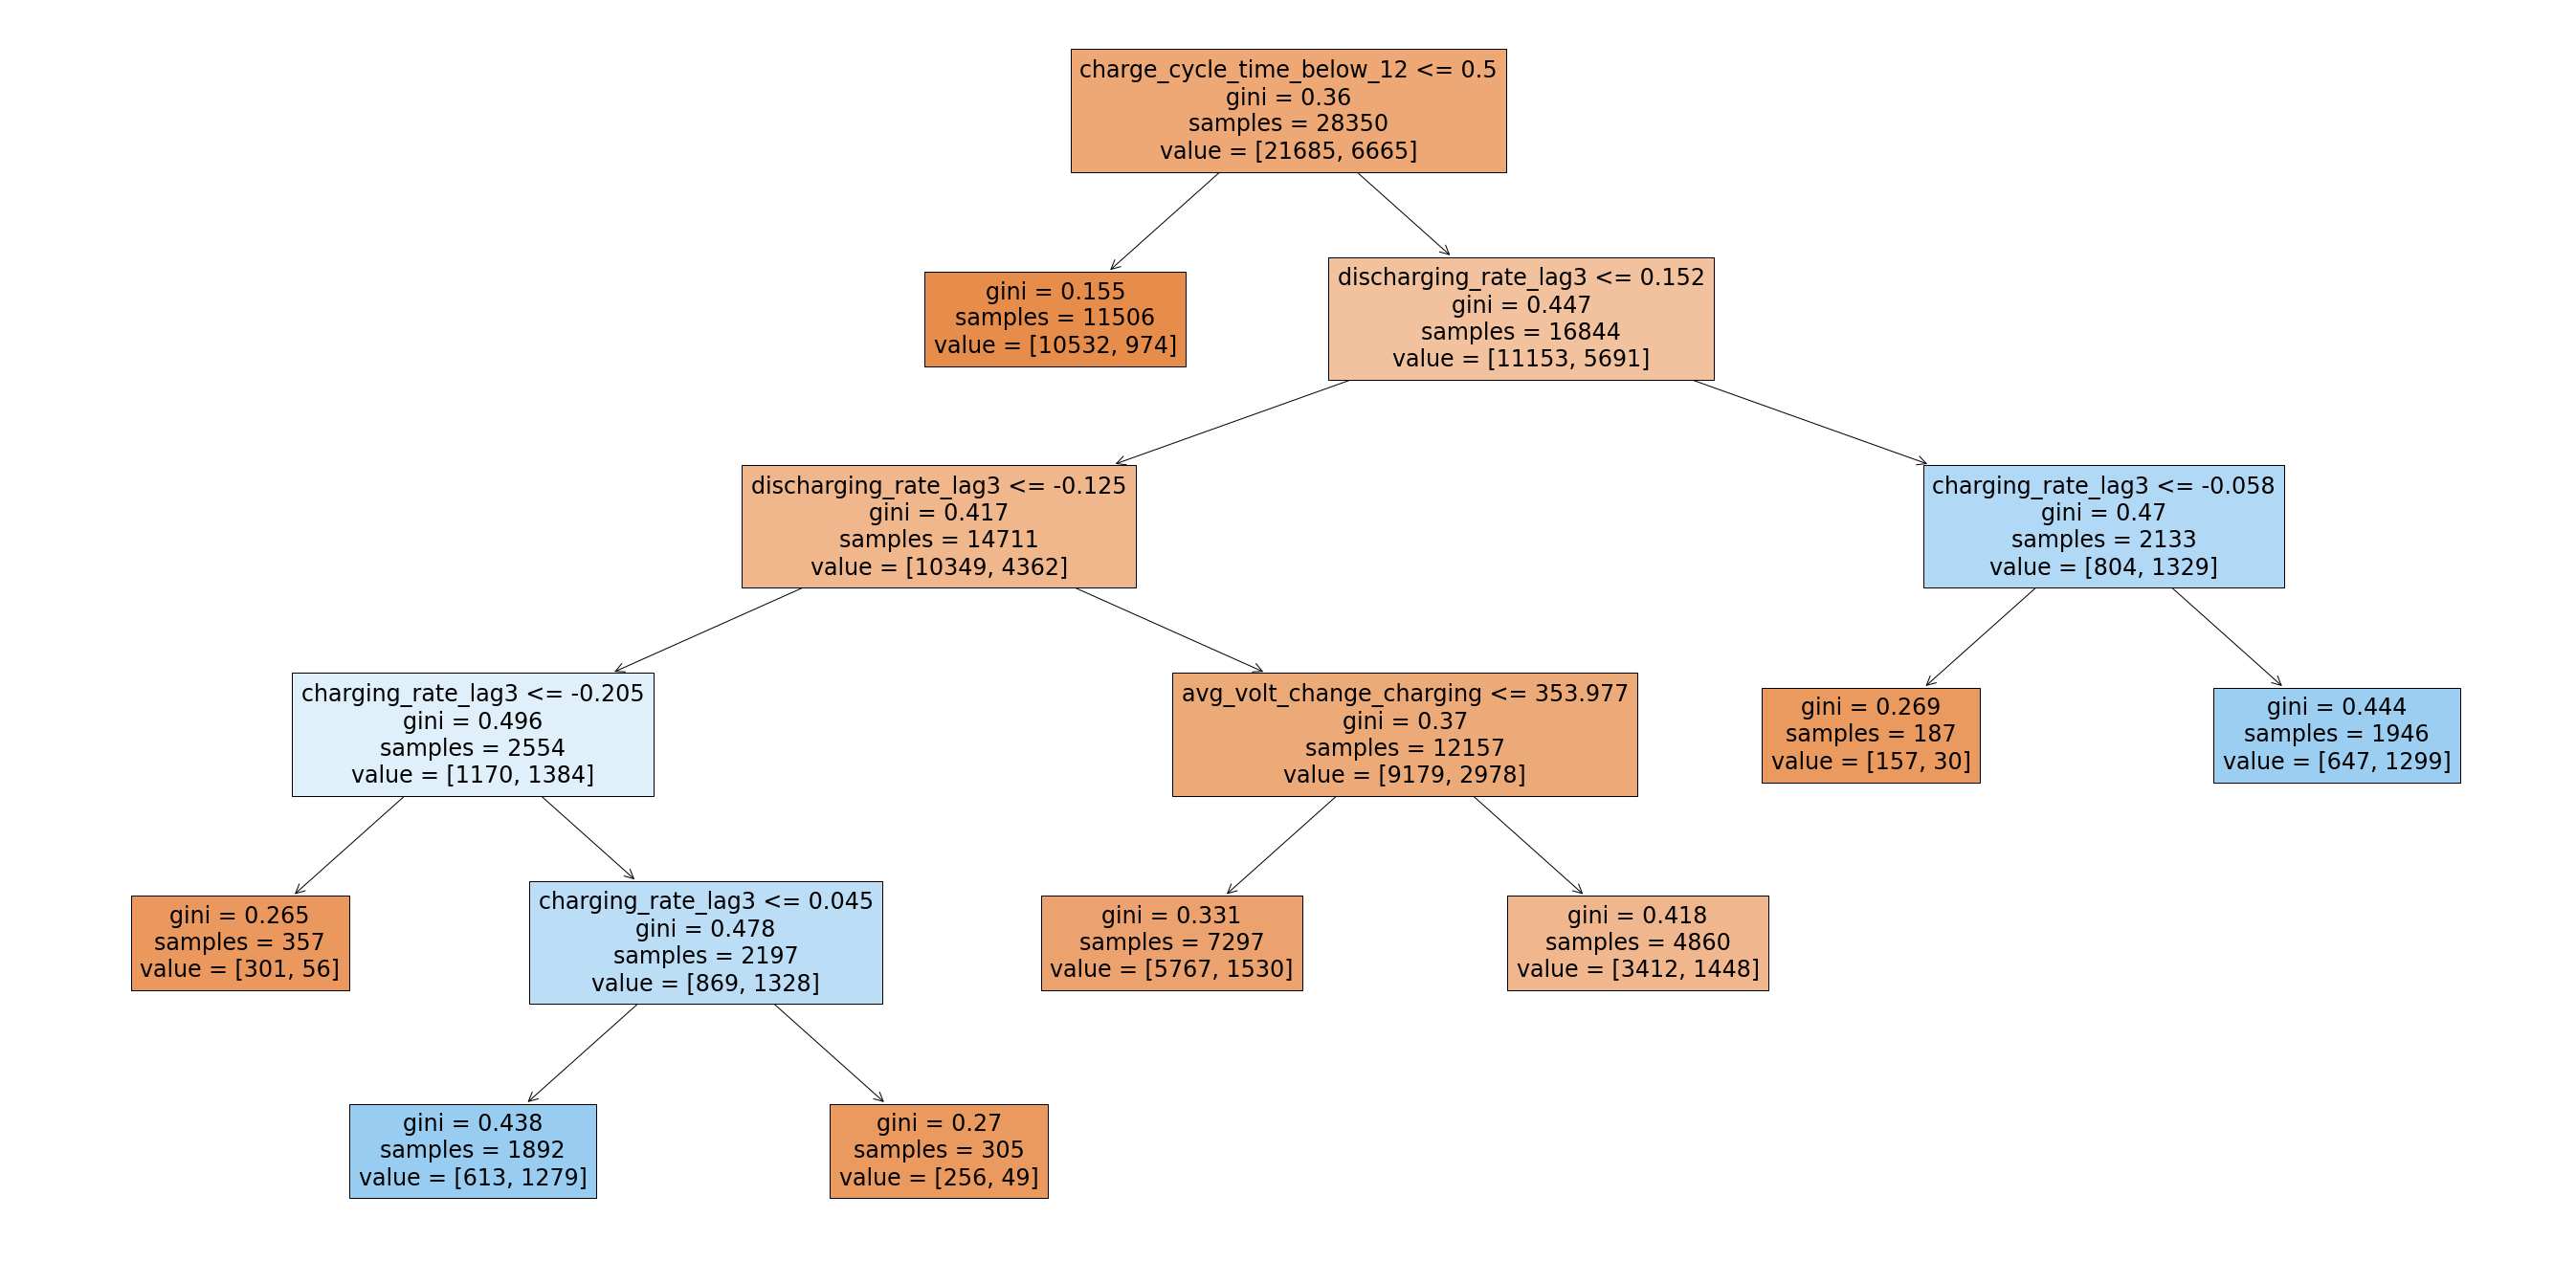

In [40]:
plt.figure(figsize=(48, 24))
tree.plot_tree(df_model, feature_names=X.columns, filled = True)

# *Model Evaluation*

In [41]:
# Evaluate accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.814238683127572


In [42]:
#displaying matrix of errors and correct predictions
confusion_matrix(y_test, y_pred)

array([[8866,  548],
       [1709, 1027]])